## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
number_of_rows = df.shape[0]
number_of_rows

294478

c. The number of unique users in the dataset.

In [4]:
number_of_unique_users = df['user_id'].nunique()
number_of_unique_users

290584

d. The proportion of users converted.

In [5]:
no_of_people_converted = df.query('converted == 1')['user_id'].count()
proportion_of_users_converted = no_of_people_converted / number_of_unique_users
proportion_of_users_converted

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
number_new_page_treatment_no_match = df.query('group == "treatment" and landing_page \
                                              != "new_page"')['user_id'].count() + \
                                            df.query('group == "control" and landing_page == "new_page"')['user_id'].count()
number_new_page_treatment_no_match

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


g. Checking for any duplicated rows

In [8]:
df.duplicated().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.query('(group == "control" and landing_page == "old_page") or (group == "treatment" \
                                                                                     and landing_page == "new_page")')

In [10]:
#cheking if the newly created pandas dataframe has equal entries as df excluding entries where treatment and new_page dont line
#up
df2.shape[0] == df.shape[0] - 3893

True

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2.user_id.duplicated()].index

Int64Index([2893], dtype='int64')

In [14]:
df2[df2.user_id.duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
#finding the index of the repeat user_id
repeat_user_id_index = df2[df2.user_id.duplicated()].index
repeat_user_id_index

Int64Index([2893], dtype='int64')

In [16]:
df2.loc[repeat_user_id_index]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.shape

(290585, 5)

In [18]:
df2.drop(repeat_user_id_index, axis=0, inplace=True)

C:\ProgramData\Anaconda3\envs\py3_env\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
#the number of rows must be 290585-1
df2.shape

(290584, 5)

In [20]:
#rechecking if the duplicated user_id is present -- must return 0
df2.user_id.duplicated().sum()

0

In [21]:
#resetting index from 0 to len(df2) after the above dropping operation
df2.reset_index(inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
df2.head(2)

,index,user_id,timestamp,group,landing_page,converted
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [23]:
total_unique_users = df2.user_id.nunique()

In [24]:
probability_converting_regardless_page = df2.query('converted == 1')['user_id'].count() / total_unique_users
probability_converting_regardless_page

0.11959708724499628

In [25]:
probability_not_converting_regardless_page = 1 - probability_converting_regardless_page
probability_not_converting_regardless_page

0.8804029127550037

b. Given that an individual was in the `control` group, what is the probability they converted?

In [26]:
total_control = df2.query('group == "control"')['user_id'].count()
total_control

145274

In [27]:
probability_converting_given_control = df2.query('group == "control" and converted == 1')['user_id'].count() \
                                                            / total_control
probability_converting_given_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [28]:
total_treatment = df2.query('group == "treatment"')['user_id'].count()
total_treatment

145310

In [29]:
probability_converting_given_treatment = df2.query('group == "treatment" and converted == 1')['user_id'].count() \
                                                            / total_treatment
probability_converting_given_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [30]:
probability_recieving_new_page = df2.query('landing_page == "new_page"')['user_id'].count() / total_unique_users
probability_recieving_new_page

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**From the above results we could note that**
<ol>
    <li>For any individual, the probability of landing on the old_page and on the new page is of 50% chance</li>
    <li>Given the equal opportunity to land on either of the pages:</li>
        <ol>
            <li>Probability that an individual converts from control group is <b>12.04%</b> </li>
            <li>Probability that an individual converts from treatment group is <b>11.88%</b> </li>
        </ol>
    <li>Considering the minute difference in the above probabilities, I would argue that there is no sufficient evidence to say that the new treatment page either leads to more conversions or less conversions than the old page</li>
    
</ol>
       

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

><b>
    <li> Null Hypothesis: $p_{new}$ - $p_{old}$ <= 0 </li>
    <li> Alternative Hypothesis: $p_{new}$ - $p_{old}$ > 0 </li>
></b>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

**Considering both $p_{new}$ and $p_{old}$ are equal under the null, then the hypotheses would be**
><b>
    <li> Null Hypothesis: $p_{new}$ - $p_{old}$ = 0 </li>
    <li> Alternative Hypothesis: $p_{new}$ - $p_{old}$ != 0 </li>
></b>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [31]:
p_new = probability_converting_regardless_page
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [32]:
p_old = probability_converting_regardless_page
p_old

0.11959708724499628

c. What is $n_{new}$?

In [33]:
n_new = total_treatment
n_new

145310

d. What is $n_{old}$?

In [34]:
n_old = total_treatment
n_old

145310

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [35]:
new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new,p_new])
new_page_converted.mean()

0.11979905030624183

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [36]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old,p_old])
old_page_converted.mean()

0.11949624939783911

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [37]:
new_page_converted.mean() - old_page_converted.mean()

0.00030280090840272

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [38]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new,p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old,p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [39]:
import seaborn as sns

In [40]:
obs_diff = probability_converting_given_treatment - probability_converting_given_control
obs_diff

-0.0015782389853555567

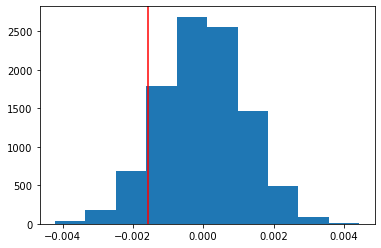

In [41]:
p_diffs = np.array(p_diffs)

plt.hist(p_diffs);
plt.axvline(obs_diff, color='r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [43]:
p_value = (p_diffs > obs_diff).mean()
p_value

0.9054

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What we calculated in part j was to find the probability of observing a statistic or more extreme value under the null. This value is known as p-value. Considering the type-I error rate as 5%, we fail to reject the null hypothesis($p_{new}$ - $p_{old}$ = 0) since p_value is much greater than the alpha(type-I) error rate**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [44]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1')['user_id'].count()
convert_new = df2.query('landing_page == "new_page" and converted == 1')['user_id'].count()
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
n_new = df2.query('landing_page == "new_page"')['user_id'].count()

In [45]:
n_old

145274

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [46]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_old, convert_new]), np.array([n_old, n_new]), alternative='smaller')

In [47]:
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<b>The z-score actually tells how many standard deviations is the parameter is away from the mean of the standard distribution. In our case, it looks the mean parameter is 1.31 std_devs away from the mean. p_value is .905 which is greater than the significance level of 5%. Hence we fail to reject the null_hypthesis. These values agree with the findings in part j. and k.</b>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since each row is either a conversion or no conversion, Logistic regression needs to be used**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [48]:
#adding intercept
df2['intercept'] = 1

<ipython-input-48-81bb9c37a7a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1


In [49]:
#adding dummy variable
df2[['ab_page','old_page']] = pd.get_dummies(df2['landing_page'])

C:\ProgramData\Anaconda3\envs\py3_env\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [50]:
df2.head(5)

,index,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [51]:
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        21:41:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

P-value associated with ab_page is .19 which is greater than .05, hence we fail to reject the null hypothesis that the ab_page does not have correlation with the "converted" variable

P-value associated with the regression model changes from p-value associated with Part-I because:
<li>In logistic regression, the null hypothesis is beta(coefficient of ab_page) is equal to zero. Otherwise the p-value used to find the probability of the extreme (beta !=0) is a <b>two tailed test</b>.</li>
<li>In the Part-I, the Null Hypothesis: $p_{new}$ - $p_{old}$ <= 0, Alternative Hypothesis: $p_{new}$ - $p_{old}$ > 0 which is a one sided test. </li>
Thus the difference is observed.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<b>The r-squared value reported by the above model suggests that the variability controlled by the model over the "converted" variable is very less. Thus let us check if there is any multi-collinearity or higher order terms present in the model. </b>

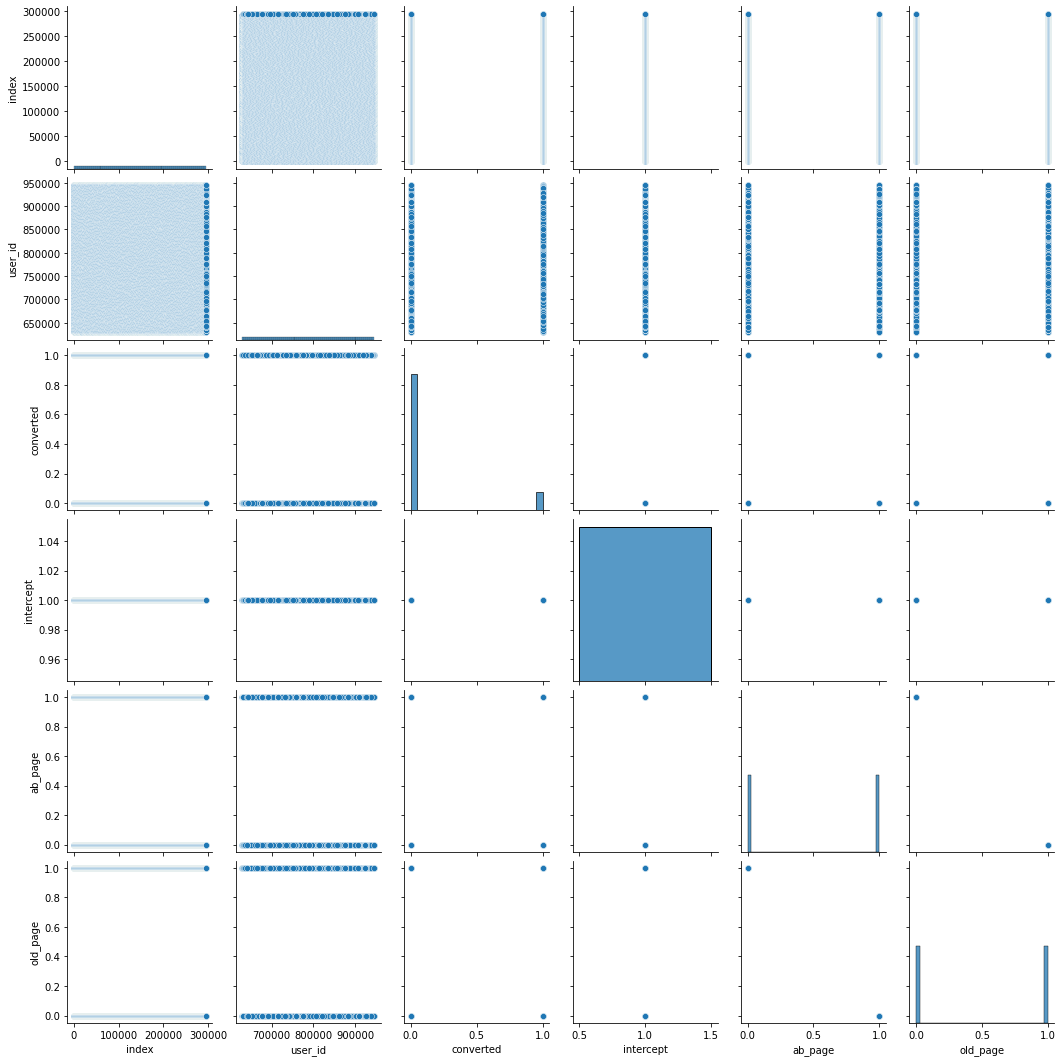

In [53]:
#finding for any interaction or higher orders terms
sns.pairplot(df2)

<b>The above plot indicates that there is no higher order terms or interaction. This could also be verified through VIF. We could do the following changes to our model</b>
<ol>
    <li>We could explore by adding other variables such as timestamp, location, country etc to increase the r-squared value</li>
    <li>However, we should be careful about multicollinearity as we add more variables.</li>
    <li>We must neglect the effects of factors such as change_aversion and novelty effect by experimenting for a longer period of time</li>
</ol>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [54]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [55]:
df_new.head()

,country,index,timestamp,group,landing_page,converted,intercept,ab_page,old_page
user_id,,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [56]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new.country)

In [57]:
log_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']])
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 23 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        21:42:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
### Fit Your Linear Model And Obtain the Results
df_new['ab_page*CA'] = df_new['ab_page'] * df_new['CA']
df_new['ab_page*UK'] = df_new['ab_page'] * df_new['UK']
df_new.head()

,country,index,timestamp,group,landing_page,converted,intercept,ab_page,old_page,CA,UK,US,ab_page*CA,ab_page*UK
user_id,,,,,,,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1,0,0
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0,1
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0,1


In [59]:
log_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'ab_page*CA', 'ab_page*UK']])
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        21:42:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page*CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_page*UK     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

<b> The above results show that all the variables and the interactions added are not statistically significant as their p_vales are greater than 5% failing to reject the null hypothesis. <b>

<a id='conclusions'></a>
## Conclusions

<b> We could tell the above three methods that, that we could not make any inference about which page is new or old. I would recommend to run the experiment to run for a long time to overcome change_aversion and novelty effect. However, we should explore more by adding in extra variables as timestamp, course_popularity, offer given etc </b>

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.